In [2]:
import sys
sys.path.insert(0, '../slowdaq')
from load_slowdaq import load_slow
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [4]:
slowdir = '/data/pb2/ChileData/slowdaq/22300000/20210227/'

In [5]:
files = sorted(glob(slowdir+'*776*'))
files

['/data/pb2/ChileData/slowdaq/22300000/20210227/slowdaq_20210227_063554_Run22300776_000.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210227/slowdaq_20210227_063559_Run22300776_001.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210227/slowdaq_20210227_063640_Run22300776_002.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210227/slowdaq_20210227_070641_Run22300776_003.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210227/slowdaq_20210227_071235_Run22300776_004.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210227/slowdaq_20210227_075735_Run22300776_005.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210227/slowdaq_20210227_080328_Run22300776_006.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210227/slowdaq_20210227_084833_Run22300776_007.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210227/slowdaq_20210227_085422_Run22300776_008.log.gz',
 '/data/pb2/ChileData/slowdaq/22300000/20210227/slowdaq_20210227_093927_Run22300776_009.log.gz',
 '/data/pb2/ChileData/slowdaq/

In [6]:
data = load_slow(files = files, slowdir=slowdir, sources=['Lakeshore151'])

Loading /data/pb2/ChileData/slowdaq/22300000/20210227/slowdaq_20210227_063554_Run22300776_000.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210227/slowdaq_20210227_063559_Run22300776_001.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210227/slowdaq_20210227_063640_Run22300776_002.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210227/slowdaq_20210227_070641_Run22300776_003.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210227/slowdaq_20210227_071235_Run22300776_004.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210227/slowdaq_20210227_075735_Run22300776_005.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210227/slowdaq_20210227_080328_Run22300776_006.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210227/slowdaq_20210227_084833_Run22300776_007.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210227/slowdaq_20210227_085422_Run22300776_008.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210227/slowdaq_20210227_093927_Run22300776_0

In [7]:
ls = data['Lakeshore151']
time = np.array(ls['time']) - ls['time'][0]
key = 'MODEL370_370A4A_T'
#l = len(ls[key][0])
tmp = np.array(ls[key])[:,12]

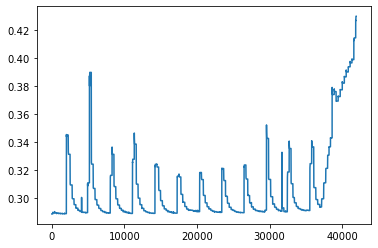

In [8]:
plt.plot(time, tmp)

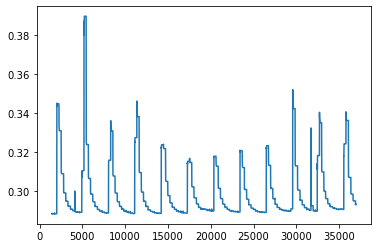

In [18]:
#fig = plt.figure(figsize=(20,10))

# for i in range(l):
#     tmp = np.array(ls[key])[:,i]

#     plt.plot(time, tmp, label=i)
s = 300
e = 7800
plt.plot(time[s:e], tmp[s:e])
#plt.plot(x, tmp_interp)
#plt.plot(x[rise], tmp_interp[rise], 'x')

In [19]:
time = time[s:e]
tmp = tmp[s:e]

x = np.linspace(time[0], time[-1], 150)
tmp_interp = np.interp(x, time, tmp)

In [39]:
rise = np.where(np.diff(tmp_interp)>1e-3)[0]
rise

array([  2,  14,  15,  27,  28,  40,  41,  53,  66,  79,  92, 104, 105,
       116, 117, 126, 129, 130, 131, 142, 143, 144])

In [48]:
a = np.where(np.diff(rise)<10)[0]+1
a

array([ 2,  4,  6, 12, 14, 15, 16, 17, 18, 20, 21])

In [49]:
start_indices = np.delete(rise, a)
start_indices

array([  2,  14,  27,  40,  53,  66,  79,  92, 104, 116, 142])

In [63]:
conv = len(tmp_interp)/(x[-1] - x[0])
end_indices = np.round(start_indices + 6*60*conv).astype(dtype=np.int)

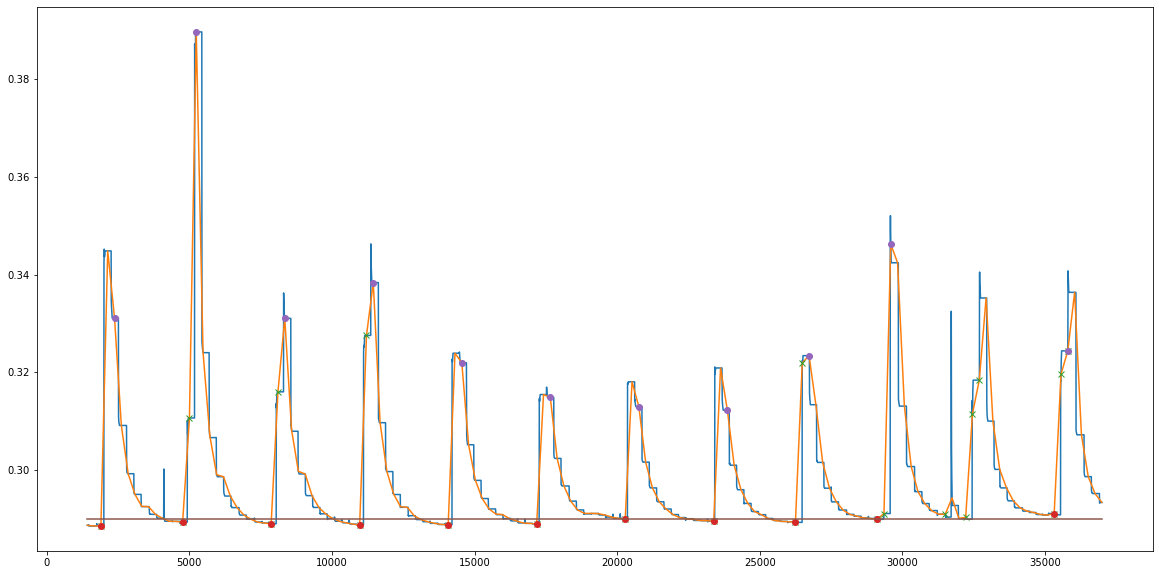

In [88]:
plt.figure(figsize=(20,10))
plt.plot(time, tmp)
plt.plot(x, tmp_interp)
plt.plot(x[rise], tmp_interp[rise], 'x')
plt.plot(x[start_indices], tmp_interp[start_indices], 'o')
plt.plot(x[end_indices], tmp_interp[end_indices], 'o')
plt.plot(x, np.ones_like(x)*0.29)

In [86]:
tmp_interp[end_indices]
manual_ends = np.array([0.345,0.38971127, 0.33105063, 0.33838043, 0.31485612, 0.31297967, 0.318, 0.32, 0.32341894, 0.34625661, 0.335,0.336  ])

In [90]:
tmp_interp[start_indices]
manual_starts = np.array([0.28860202, 0.28933616, 0.28899213, 0.2887317 , 0.2888019 ,
       0.28894712, 0.29003136, 0.28951407, 0.28932325, 0.28990204,0.290,
       0.29109534])

In [91]:
#heating = tmp_interp[end_indices]-tmp_interp[start_indices] 
heating = manual_ends - manual_starts
heating *= 1000
heating

array([ 56.39798, 100.37511,  42.0585 ,  49.64873,  26.05422,  24.03255,
        27.96864,  30.48593,  34.09569,  56.35457,  45.     ,  44.90466])

In [92]:
az_v = np.linspace(2.35, 2.90, 12)
az_v

array([2.35, 2.4 , 2.45, 2.5 , 2.55, 2.6 , 2.65, 2.7 , 2.75, 2.8 , 2.85,
       2.9 ])

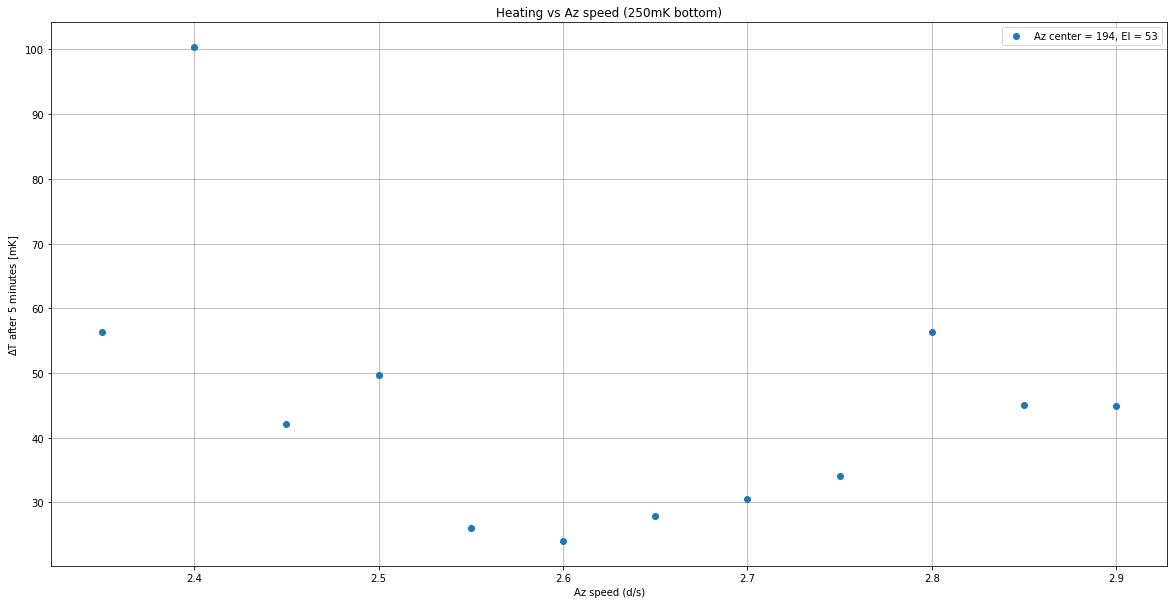

In [93]:
plt.figure(figsize=(20,10))
plt.plot(az_v, heating, 'o', label='Az center = 194, El = 53')
plt.title('Heating vs Az speed (250mK bottom)')
plt.ylabel('$\Delta$T after 5 minutes [mK]')
plt.xlabel('Az speed (d/s)')
plt.legend()
plt.grid()